# Airbnb Demand Analysis – Data Preprocessing

This notebook preprocesses raw Airbnb review data for the purpose of constructing
a monthly demand time series. Review counts are used as a proxy for booking
activity, enabling subsequent exploratory analysis and forecasting.


## Data Source and Context

The dataset consists of individual Airbnb guest reviews for listings located in
Lisbon, Portugal. The data is sourced from the Inside Airbnb initiative, which
provides open datasets for research and policy analysis.

Due to the large size of the raw dataset, it is stored locally and excluded from
version control. Only processed and aggregated outputs are included in the
repository.


In [26]:
# Local path to large raw dataset (NOT in GitHub)
RAW_REVIEWS_PATH = Path.home() / "Desktop" / "reviews.csv"

In [28]:


import pandas as pd
import matplotlib.pyplot as plt
import os  # Added import for the os module

# Load the reviews dataset from CSV file
df = pd.read_csv(RAW_REVIEWS_PATH)

# Display the first few rows of the dataframe
df.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1113142,60014456,2016-01-18,35314589,Andre,Adoramos o lugar. Muito bem localizado e práti...
1,1113142,86635385,2016-07-17,36799194,Daniele,Perfect host. Everything was fine. I will cert...
2,1113142,94639801,2016-08-16,1826748,Sibtain,"All in all, it was a very good, modern apartme..."
3,1113142,112991958,2016-11-09,5985047,Nathan,Lovely apartment and frictionless stay. Booked...
4,1113142,215013241,2017-11-27,154490966,Agenor,Apartamento muito bom. Anfitrião atencioso e s...


## Temporal Formatting

To enable time-based aggregation, the review date column is converted to a
datetime format. This transformation allows the application of resampling
operations required for time series construction.


In [30]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

## Temporal Aggregation

The review data is aggregated at a monthly frequency in order to construct a
time series representation of Airbnb demand. Monthly aggregation reduces noise
associated with daily fluctuations and facilitates the identification of
long-term trends and seasonal patterns.

The resulting time series represents the total number of reviews per month and
serves as a proxy for demand.


In [32]:

# Aggregate data to get monthly review counts
# 1. Set the date as index
# 2. Resample by month end ('ME')
# 3. Count the number of reviews per month
# 4. Reset index to make date a column again and name the count column
monthly_demand = (
    df
    .set_index('date')
    .resample('ME')
    .size()
    .reset_index(name='reviews_count')
)

# Display the first few rows of the monthly aggregated data
monthly_demand.head()


,date,reviews_count
0,2010-07-31,1
1,2010-08-31,0
2,2010-09-30,2
3,2010-10-31,0
4,2010-11-30,0


## Output Storage

The aggregated monthly demand dataset is saved as a lightweight CSV file. This
processed output is used in subsequent exploratory analysis and forecasting
notebooks and is included in the project repository for reproducibility.


In [34]:
os.makedirs("../data", exist_ok=True)  # This creates the directory if it doesn't exist
monthly_demand.to_csv("../data/monthly_demand.csv", index=False)

## Initial Demand Visualization

An initial visualization of the monthly demand series is produced to provide a
high-level overview of Airbnb activity over time. Visual inspection is a
fundamental step in time series analysis, allowing for the identification of
trends, seasonal behavior, and potential anomalies.


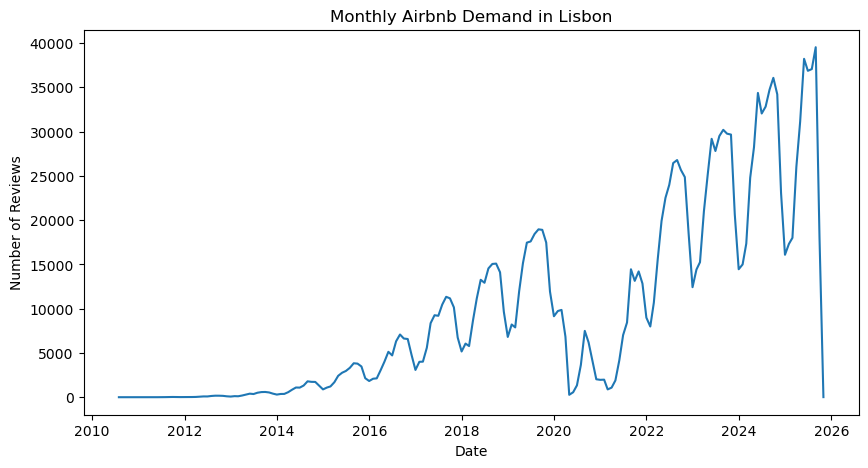

In [35]:

# Create a time series plot of monthly reviews
plt.figure(figsize=(10,5))
plt.plot(monthly_demand['date'], monthly_demand['reviews_count'])
plt.title("Monthly Airbnb Demand in Lisbon")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.show()